A kernel, in the context of image processing, is a small matrix that is used for various operations such as blurring, sharpening, edge detection, and more. When performing operations like convolution or filtering on an image, a kernel is applied to each pixel of the image to produce a new value for that pixel. The size and values within the kernel matrix determine the specific effect or operation being applied to the image.

Here's how the convolution process works with a kernel:

1. Place the kernel matrix on top of the target pixel in the image.
2. Multiply each element of the kernel with the corresponding pixel value in the image.
3. Sum up all the products.
4. Replace the target pixel value with the result of the summation.

The key aspect of the kernel is that it acts as a weighted average or a mathematical operation that can emphasize certain features or characteristics of the image. Different kernels will produce different effects:

- **Blurring kernels**: These kernels typically have equal or weighted values, which result in averaging the pixel values around a specific pixel. This reduces noise and smoothens the image.
- **Sharpening kernels**: These kernels emphasize edges and details in the image by accentuating the differences in pixel values.
- **Edge detection kernels**: These kernels highlight edges or boundaries between different regions in the image by detecting abrupt changes in pixel intensity.

In summary, kernels are fundamental in image processing as they define the specific operation applied to each pixel in the image during convolution, allowing for a wide range of image enhancements and manipulations.

**Importing the required libraries**

In [1]:
import cv2
import numpy as np
from scipy import ndimage
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pyplot as plt

**Reading the Image and then using a Gray Scaling the image for ease of operations**

In [2]:
img = cv2.imread('images.jpeg')
gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

**Defining the kernels**

How do the values of the kernel matrix effect the image?
1. *Magnitue of values*: The magnitude of the values of the kernel matrix determines the intensity of the effect. Higher magnitude values will result in a more pronounced effect on the image, while lower magnitude values will produce a subtler effect.

2. *Postive vs. Negative Values*: Positive values in the kernel matrix will enhance or brighten certain features in the image, while negative values will supress or darken them. The ombination of positive and negative values allows for selective enhancement or suppression of image features.

3. *Spatial Arrangement*: The spatial arrangement of the values in the kernel matrix determines the direction and shape of the effect. For example, kernels with positive values arranged in a cross shape are often used for edge detection, while kernels with central positve values surrounded by negative values are used for sharpening.

4. *Normalization*: Normalizing the kernel matrix will ensure that the sum of all values in the matrix is equal to 1 or within a certain range. Normalization helps maintain the overall brightness level of the image and prevents artifacts such as over-brightening or darkening.

Overall, by adjusting the values in the kernel matrix, it is possible to achieve a wide range of effects including blurring, sharpening, edge detection, and more, allowing for powerful image enhancement and manipulation in image processing.

**1. Identity Kernel**: Preserves the original image, resulting in no change when applied.

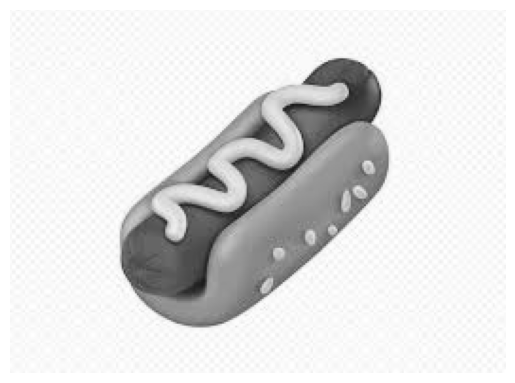

In [20]:
#define the kernel
identity_kernel = np.array([[0,0,0],
                            [0,1,0],
                            [0,0,0]])

#apply the filter
identity_img = cv2.filter2D(gray_img, -1, identity_kernel)

# Convert the image from BGR to RGB (OpenCV reads images in BGR format by default)
image_rgb = cv2.cvtColor(identity_img, cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

**2. Edge Detection Kernel**: Highlights edges in the image by emphasizing the differences in pixel values.

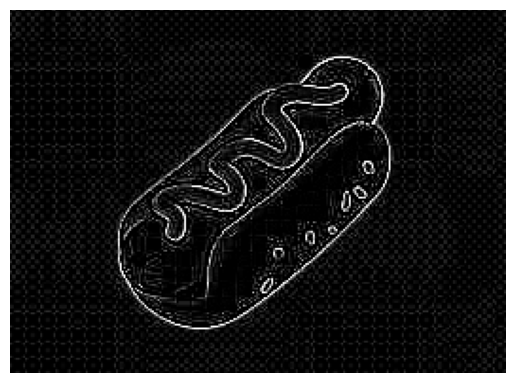

In [19]:
#defining the kernel
edge_kernel = np.array([[-1,-1,-1],
                        [-1,8,-1],
                        [-1,-1,-1]])


#apply the filter
edge_img = cv2.filter2D(gray_img, -1, edge_kernel)

#display the filtered image
#cv2.imshow('eigrig',edge_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Convert the image from BGR to RGB (OpenCV reads images in BGR format by default)
image_rgb = cv2.cvtColor(edge_img, cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

**3. Sharpen Kernel**: Enhances the details and edges in the image, making it appear sharper.

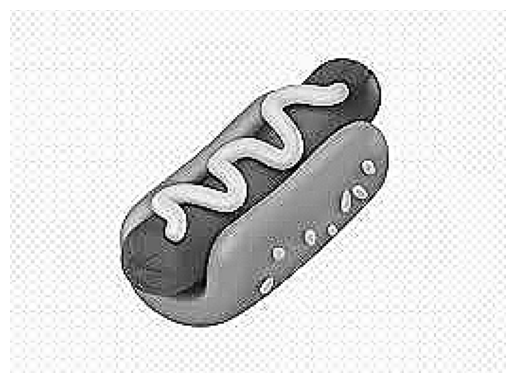

In [16]:
#defining the kernel
sharpen_kernel = np.array([[0,-1,0],
                           [-1,5,-1],
                           [0,-1,0]])

#apply the filter
sharp_img = cv2.filter2D(gray_img, -1, sharpen_kernel)

#display the image
#cv2.imshow('Sharpened Image', sharp_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Convert the image from BGR to RGB (OpenCV reads images in BGR format by default)
image_rgb = cv2.cvtColor(sharp_img, cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

**4. Box Blur Kernel**: Applies a simple averaging filter, resulting in a smoothed, blurred image.

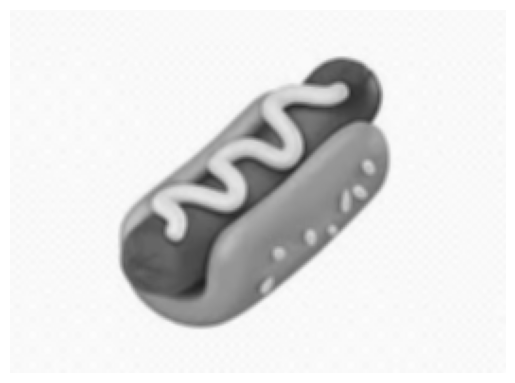

In [17]:
#defining the kernel
box_blur_kernel = np.ones((3, 3), dtype=np.float32) / 9.0

#apply the filter
blur_img = cv2.filter2D(gray_img, -1, box_blur_kernel)

#display the filtered image
#cv2.imshow('Blurred Image', blur_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Convert the image from BGR to RGB (OpenCV reads images in BGR format by default)
image_rgb = cv2.cvtColor(blur_img, cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

**5. Gaussian Blur Kernel**: Applies a weighted average, giving more importance to the central pixel, resulting in a smoother blur compared to the box blur.

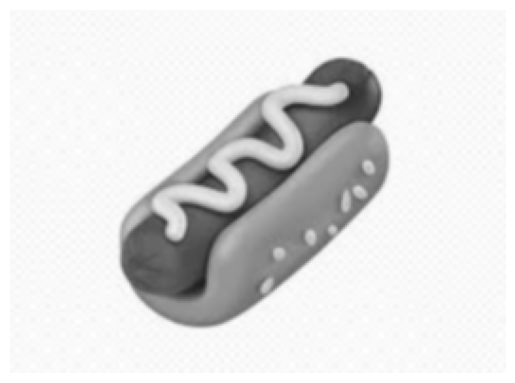

In [18]:
#defining the kernel
gaussian_blur_kernel = np.array([[1,2,1],
                                 [2,4,2],
                                 [1,2,1]]) / 16.0

#apply the filter
gauss_img = cv2.filter2D(gray_img, -1, gaussian_blur_kernel)

#display the image
#cv2.imshow('Blurred Image 2', gauss_img)
#cv2.waitKey(0)
#cv2.destroyAllWindows()

# Convert the image from BGR to RGB (OpenCV reads images in BGR format by default)
image_rgb = cv2.cvtColor(gauss_img, cv2.COLOR_BGR2RGB)
# Display the image using Matplotlib
plt.imshow(image_rgb)
plt.axis('off')  # Turn off axis labels and ticks
plt.show()

In [23]:
# Apply convolve function with different modes using SciPy
modes = ['reflect', 'constant', 'nearest', 'mirror', 'wrap']

for mode in modes:
    convolved_image = ndimage.convolve(gray_img, edge_kernel, mode=mode)
    cv2.imshow(f'Convolved Image with {mode} mode', convolved_image)
    cv2.waitKey(0)

cv2.destroyAllWindows()

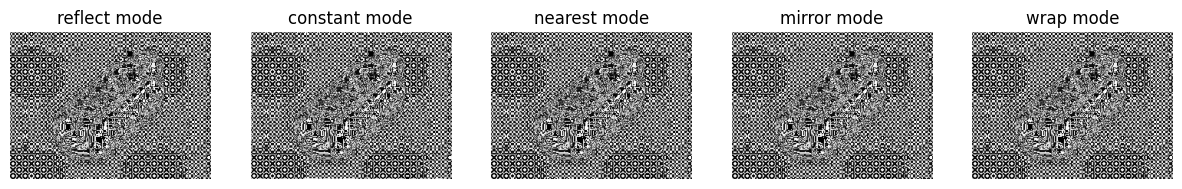

In [25]:
from scipy import ndimage
modes = ['reflect', 'constant', 'nearest', 'mirror', 'wrap']
fig, axes = plt.subplots(1, len(modes), figsize=(15, 4))

for i, mode in enumerate(modes):
    convolved_image = ndimage.convolve(gray_img, edge_kernel, mode=mode)
    axes[i].imshow(convolved_image, cmap='gray')
    axes[i].set_title(f'{mode} mode')
    axes[i].axis('off')

plt.show()